# Animal Shelter Data Analysis: Factors Influencing Adoption vs Euthanasia
This analysis was done by: **Salah Al-Basha**<br>

------------

### Description
The study of Factors Influencing Adoption vs Euthanasia in Animal Shelters delves into the multifaceted dynamics that contribute to the outcomes of animal shelter residents. By meticulously examining a range of variables and their interplay, this analysis aims to unravel the determinants that steer the choices between adoption and euthanasia for sheltered animals. Through rigorous exploration and data-driven insights, this investigation sheds light on the intricate factors that influence the ultimate destiny of these animals within the shelter environment.<br>
<br>

### Objective
The primary objective of this analysis is to gain comprehensive insights into the diverse factors that play a pivotal role in shaping the outcomes of animals in shelters, specifically focusing on the critical dichotomy between adoption and euthanasia. By leveraging data analysis techniques, including visualization, machine learning, and potentially linear optimization, we aim to uncover patterns, correlations, and trends that empower informed decision-making within the realm of animal shelter management. Ultimately, this analysis seeks to provide actionable recommendations and strategies that can contribute to enhancing adoption rates while minimizing euthanasia occurrences, thereby fostering improved animal welfare and shelter efficacy.<br>

------------

# Data Pipeline

## Data Preparation and Cleaning:
- Loaded raw data files using Pandas.
- Conducted initial analysis of features to identify issues like missing or incorrect values.
- Performed data cleaning to address issues in the dataset.


## Exploratory Data Analysis and Visualization:
### 1. Analyzed key features to understand their distributions and relationships:
- Animal Type
- Sex Upon Intake
- Age at Intake
- Intake Condition
- Intake Type

### 2. Utilized visualizations to gain insights into the data.


## Feature Engineering:

#### Created new features to enhance model predictive power, including:
- Exploration of Duration of Stay and its impact on Adoption and Euthanasia outcomes.


## Data Preprocessing:
- Imputed missing values in numerical columns using median values.
- Applied one-hot encoding to categorical columns to transform them into numerical features.
- Created binary feature 'NamePresent' based on the presence of names.
- Dropped 'Name' and 'Animal ID' columns.
- Performed feature scaling using StandardScaler on selected numerical columns.


## Model Building:
### Constructed the predictive model:
- Selected appropriate features for training and testing.
- Chose a machine learning algorithm suitable for the prediction task.
- Split data into training and testing sets.
- Trained and evaluated the model's performance.

------------

## Data Dictionary
The dataset has the following information:

1.  **Animal ID**: Unique identification code assigned to each animal.
2.  **Name**: The given name of the animal.
3.  **IntakeDT**: Date and time of animal's intake at the shelter.
4.  **OutcomeDT**: Date and time of the animal's outcome (adoption, euthanasia, etc.).
5.  **DOB**: Date of birth of the animal.
6.  **Intake Type**: Reason or circumstance under which the animal was brought to the shelter.
7.  **Intake Condition**: Health or condition of the animal upon intake.
8.  **Animal Type**: The species or type of animal (e.g., dog, cat).
9.  **Sex upon Intake**: Gender and sterilization status of the animal upon intake.
10. **Breed**: The breed or breed mix of the animal.
11. **Color**: The color of the animal's coat or markings.
12. **Outcome Type**: The overall outcome for the animal (e.g., adoption, euthanasia).
13. **Outcome Subtype**: Further classification of the outcome (if applicable).
14. **Sex upon Outcome**: Gender and sterilization status of the animal at outcome.
15. **Obedience**: Obedience status of the animal (if available).
16. **Weight at Intake (lbs)**: The weight of the animal upon intake (in pounds).
17. **Height (in)**: The height of the animal (in inches).
18. **Weight at Outcome (lbs)**: The weight of the animal at outcome (in pounds).
19. **AgeAtIntake**: The age of the animal at the time of intake (in days).
20. **TimeAtShelter**: Duration of the animal's stay at the shelter (in days).
21. **AgeAtOutcome**: The age of the animal at the time of outcome (in days).

------------

#### Importing the necessary libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Preparation and Cleaning

- Load files using Pandas
- Analyze the features
- Fix any missing/incorrect values

In [2]:
df = pd.read_excel('AnimalShelter.xlsx')

#### Let's see the first and last 10 records of the dataset

In [3]:
df.tail(10)

,Animal ID,Name,IntakeDT,OutcomeDT,DOB,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,...,Outcome Type,Outcome Subtype,Sex upon Outcome,Obedience*,Weight at Intake (lbs)*,Height (in)*,Weight at Outcome (lbs)*,AgeAtIntake,TimeAtShelter,AgeAtOutcome
95491,A664234,NO,2013-10-01 10:36:59.990,2013-10-01 07:09:00.029,2005-10-01,Stray,Injured,Dog,Intact Male,Border Collie,...,Euthanasia,Suffering,Intact Male,3.0,40.79,19.80,40.79,2922,0,2922
95492,A664313,NO,2013-10-01 05:26:59.971,2013-10-01 06:33:00.029,2013-09-24,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Transfer,Partner,Intact Female,NaN,2.28,2.32,2.53,7,0,7
95493,A658012,YES,2013-10-01 01:48:00.000,2013-10-01 06:27:00.000,2010-07-05,Stray,Normal,Dog,Neutered Male,Chihuahua Shorthair,...,Return to Owner,Return to Owner,Neutered Male,3.0,5.72,6.96,5.72,1184,0,1184
95494,A664288,NO,2013-10-01 03:51:59.990,2013-10-01 06:02:00.010,2011-10-01,Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,...,Euthanasia,Suffering,Intact Male,NaN,11.93,9.00,11.93,731,0,731
95495,A664238,NO,2013-10-01 09:33:00.029,2013-10-01 04:47:00.038,2013-06-01,Stray,Normal,Cat,Unknown,American Shorthair Mix,...,Euthanasia,Medical,Unknown,NaN,9.06,7.50,13.45,122,0,122
95496,A664280,YES,2013-10-01 02:33:59.962,2013-10-01 03:51:00.029,2007-10-01,Stray,Normal,Dog,Spayed Female,Miniature Poodle,...,Return to Owner,Return to Owner,Spayed Female,3.0,19.67,11.65,19.67,2192,0,2192
95497,A521520,YES,2013-10-01 07:50:59.971,2013-10-01 03:38:59.971,2006-09-07,Stray,Normal,Dog,Spayed Female,Border Terrier/Border Collie,...,Return to Owner,Return to Owner,Spayed Female,2.0,29.25,16.10,29.25,2581,0,2581
95498,A664233,YES,2013-10-01 08:53:00.010,2013-10-01 03:33:00.029,2010-09-30,Stray,Injured,Dog,Intact Female,Pit Bull,...,Euthanasia,Suffering,Intact Female,1.0,45.15,18.78,45.15,1097,0,1097
95499,A664260,NO,2013-10-01 11:21:00.029,2013-10-01 01:00:00.029,2013-09-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Transfer,Partner,Intact Female,NaN,3.04,2.95,3.80,21,0,21
95500,A664261,NO,2013-10-01 11:21:00.029,2013-10-01 01:00:00.029,2013-09-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Transfer,Partner,Intact Female,NaN,2.72,2.94,3.48,21,0,21


In [4]:
df.head(10)

,Animal ID,Name,IntakeDT,OutcomeDT,DOB,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,...,Outcome Type,Outcome Subtype,Sex upon Outcome,Obedience*,Weight at Intake (lbs)*,Height (in)*,Weight at Outcome (lbs)*,AgeAtIntake,TimeAtShelter,AgeAtOutcome
0,A785936,NO,2018-12-13 10:57:59.962,2019-03-13 09:20:00.010,2018-12-12,Stray,Nursing,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,2.03,2.05,5.31,1,89,91
1,A774111,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:11:59.971,2018-05-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,3.17,3.39,11.17,31,276,307
2,A774113,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:11:59.971,2018-05-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,3.47,3.39,11.47,31,276,307
3,A774114,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:09:59.962,2018-05-10,Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,...,Adoption,Foster,Neutered Male,NaN,3.51,3.40,11.51,31,276,307
4,A774115,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:09:59.962,2018-05-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,3.83,3.39,11.83,31,276,307
5,A774110,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:09:00.000,2018-05-10,Stray,Normal,Cat,Intact Female,Domestic Medium Hair Mix,...,Adoption,Foster,Spayed Female,NaN,3.58,3.40,11.58,31,276,307
6,A790596,NO,2019-03-12 11:44:00.010,2019-03-13 09:04:59.981,2018-03-12,Public Assist,Normal,Other,Unknown,Bat Mix,...,Euthanasia,Rabies Risk,Unknown,NaN,NaN,NaN,NaN,365,0,366
7,A790577,NO,2019-03-12 05:08:59.971,2019-03-13 09:00:00.000,2017-03-12,Wildlife,Normal,Other,Unknown,Bat Mix,...,Euthanasia,Rabies Risk,Unknown,NaN,NaN,NaN,NaN,730,1,731
8,A790523,YES,2019-03-11 07:14:00.010,2019-03-12 12:06:59.990,2018-03-11,Stray,Normal,Dog,Intact Male,Boxer,...,Return to Owner,Return to Owner,Intact Male,3.0,71.01,22.97,71.01,365,1,366
9,A787807,GIVEN,2019-01-20 12:38:00.010,2019-03-12 12:04:00.019,2018-08-20,Stray,Normal,Dog,Intact Female,Dachshund/Chihuahua Shorthair,...,Adoption,Foster,Spayed Female,4.0,10.09,6.91,10.09,153,50,204


#### Finding the shape of the AnimalShelter dataframe

In [5]:
df.shape

(95501, 21)

The **.shape** method tells us that the dataset contains 21 columns and 95,501 rows.

#### Finding the size of the pima dataframe

In [6]:
print("The total number of elements is: ", df.size)

The total number of elements is:  2005521


#### Analyzing the data types of all the variables in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95501 entries, 0 to 95500
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Animal ID                 95501 non-null  object        
 1   Name                      95501 non-null  object        
 2   IntakeDT                  95501 non-null  datetime64[ns]
 3   OutcomeDT                 95501 non-null  datetime64[ns]
 4   DOB                       95501 non-null  datetime64[ns]
 5   Intake Type               95501 non-null  object        
 6   Intake Condition          95501 non-null  object        
 7   Animal Type               95501 non-null  object        
 8   Sex upon Intake           95501 non-null  object        
 9   Breed                     95501 non-null  object        
 10  Color                     95501 non-null  object        
 11  Outcome Type              95501 non-null  object        
 12  Outcome Subtype   

**Observations:**<br>
- The data types include datetime, float, int, and object (string). <br>
- Additionally, some columns have missing values, such as 'Obedience*', 'Weight at Intake (lbs)*', 'Height (in)*', and 'Weight at Outcome (lbs)*'.

#### Checking for Missing Values:

In [8]:
df.isnull().values.any()

True

#### Quantifying Missing Data Across Columns:

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Obedience*                  0.425755
Weight at Outcome (lbs)*    0.062324
Height (in)*                0.062324
Weight at Intake (lbs)*     0.062324
Animal ID                   0.000000
Outcome Type                0.000000
TimeAtShelter               0.000000
AgeAtIntake                 0.000000
Sex upon Outcome            0.000000
Outcome Subtype             0.000000
Color                       0.000000
Name                        0.000000
Breed                       0.000000
Sex upon Intake             0.000000
Animal Type                 0.000000
Intake Condition            0.000000
Intake Type                 0.000000
DOB                         0.000000
OutcomeDT                   0.000000
IntakeDT                    0.000000
AgeAtOutcome                0.000000
dtype: float64

#### Columns with Non-Zero Missing Values:

In [10]:
missing_percentages[missing_percentages != 0] * 100

Obedience*                  42.575470
Weight at Outcome (lbs)*     6.232395
Height (in)*                 6.232395
Weight at Intake (lbs)*      6.232395
dtype: float64

#### Checking Data Type of Missing Percentages:

In [11]:
type(missing_percentages)

pandas.core.series.Series

<AxesSubplot:>

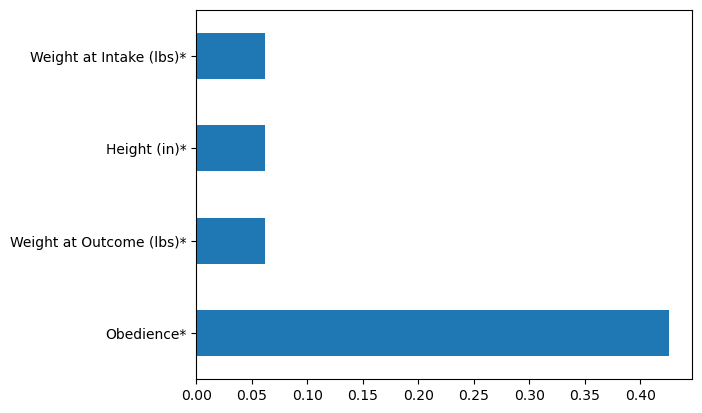

In [12]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

**Observations:**<br>
- **Obedience**: Approximately 42.58% of the entries in the "Obedience*" column have missing values.
- **Weight at Outcome (lbs)**: About 6.23% of the entries in the "Weight at Outcome (lbs)*" column have missing values.
- **Height (in)**: Approximately 6.23% of the entries in the "Height (in)*" column have missing values.
- **Weight at Intake (lbs)**: About 6.23% of the entries in the "Weight at Intake (lbs)*" column have missing values.
<br>
1. These percentages indicate the proportion of missing values in each respective column. Missing values in the "Obedience*" column are more prevalent compared to the other columns, where the missing values range around 6.23%.
2. It may be reasonable to omit the "Obedience*" column from this analysis due to the high proportion of missing values (approximately 42.58%), which could potentially impact the reliability and interpretability of the results.

#### Finding the summary statistics for all variables except 'Outcome' in the pima data

In [13]:
df.iloc[:, 0:8].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
IntakeDT,95501,2016-05-25 23:50:54.929307904,2013-10-01 01:12:00.000,2015-01-31 02:30:00.028999936,2016-05-17 02:19:59.980999936,2017-09-09 05:15:00.000000000,2019-03-12 11:44:00.010
OutcomeDT,95501,2016-06-11 17:55:29.554210048,2013-10-01 01:00:00.029,2015-02-13 03:11:59.971000064,2016-06-06 02:17:00.009999872,2017-09-29 04:23:59.971000064,2019-03-13 09:20:00.010
DOB,95501,2014-03-15 02:25:34.903299584,1991-12-11 00:00:00.000,2013-01-09 00:00:00.000000000,2014-10-16 00:00:00.000000000,2016-06-07 00:00:00.000000000,2019-03-07 00:00:00.000


**Observations**:
1. **IntakeDT**: The data covers a period from October 1, 2013, to March 12, 2019. The mean intake date and time are approximately May 25, 2016, around 11:50 PM. The minimum intake date is October 1, 2013, at 01:12 AM, and the maximum intake date is March 12, 2019, at 11:44 AM.
2. **OutcomeDT**: The data covers a period from October 1, 2013, to March 13, 2019. The mean outcome date and time are approximately June 11, 2016, around 05:55 PM. The minimum outcome date is October 1, 2013, at 01:00 AM, and the maximum outcome date is March 13, 2019, at 09:20 AM.
3. **DOB (Date of Birth)**: The data covers a period from December 11, 1991, to March 7, 2019. The mean date of birth is approximately March 15, 2014. The minimum birth date is December 11, 1991, and the maximum birth date is March 7, 2019.
4. The summary statistics provide insights into the distribution of datetime variables, showing measures of central tendency (mean, median) as well as dispersion (minimum, maximum, quartiles).
5. There seems to be a relatively consistent distribution of intake and outcome dates over the years, with some variation in the specific times.
6. The data covers a span of many years, indicating a substantial historical record of animal intake and outcome events.

# Exploratory Data Analysis and Visualization

1. **Analyzed Features**:
     - Animal Type
     - Sex Upon Intake
     - Age at Intake
     - Intake Condition
     - Intake Type
<br><br>
2. **Feature Engineering**:
    - Exploring Duration of Stay and its Impact on Adoption and Euthanasia Outcomes
<br><br>
3. **Data Preprocessing**:
    - Imputation of Numerical Features with Missing Values
    - Encoding Categorical Data
    - Feature Scaling

#### Filtering Data: Selecting Adoption and Euthanasia Cases

In [14]:
# Create a copy of the dataset
filtered_df = df.copy()

In [15]:
# Filter rows where the outcome type is either "Adoption" or "Euthanasia"
filtered_df = filtered_df[filtered_df['Outcome Type'].isin(['Adoption', 'Euthanasia'])]

In [16]:
filtered_df.columns

Index(['Animal ID', 'Name', 'IntakeDT', 'OutcomeDT', 'DOB', 'Intake Type',
       'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color',
       'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Obedience*',
       'Weight at Intake (lbs)*', 'Height (in)*', 'Weight at Outcome (lbs)*',
       'AgeAtIntake', 'TimeAtShelter', 'AgeAtOutcome'],
      dtype='object')

## Analyzed Features
### Animal Type

In [17]:
animal_type = filtered_df['Animal Type']
animal_type

0          Cat
1          Cat
2          Cat
3          Cat
4          Cat
         ...  
95474    Other
95491      Dog
95494      Cat
95495      Cat
95498      Dog
Name: Animal Type, Length: 48352, dtype: object

In [18]:
len(animal_type)

48352

In [19]:
outcome_by_animal_type = filtered_df.groupby(['Animal Type', 'Outcome Type']).size().unstack()
print(outcome_by_animal_type)

Outcome Type  Adoption  Euthanasia
Animal Type                       
Bird             173.0       100.0
Cat            15647.0      1612.0
Dog            25321.0      1560.0
Livestock          3.0         NaN
Other            304.0      3632.0


In [20]:
outcome_by_animal_type[:]

Outcome Type,Adoption,Euthanasia
Animal Type,,
Bird,173.0,100.0
Cat,15647.0,1612.0
Dog,25321.0,1560.0
Livestock,3.0,NaN
Other,304.0,3632.0


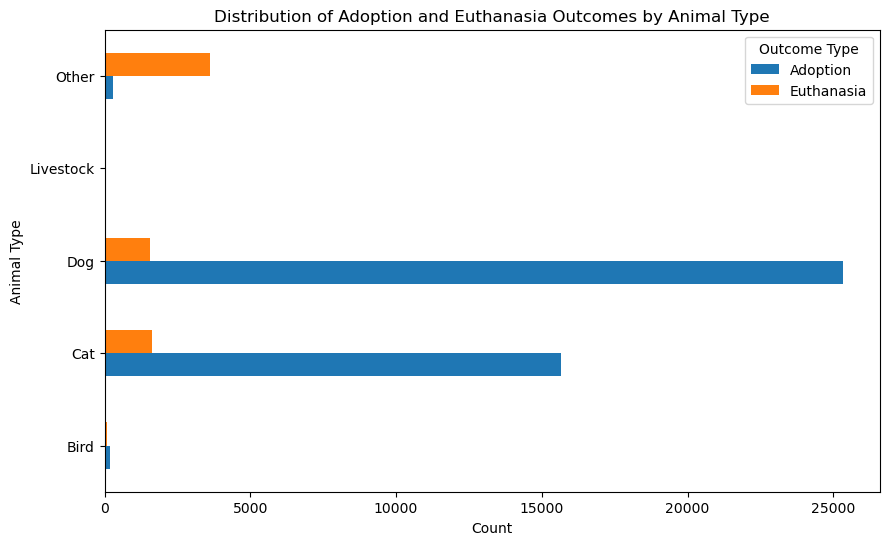

In [21]:
outcome_by_animal_type[:].plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Adoption and Euthanasia Outcomes by Animal Type')
plt.xlabel('Count')
plt.ylabel('Animal Type')
plt.show()

**Observations**:
1. Cats and dogs have the highest number of adoptions, followed by birds and other animals.
2. Cats and dogs also have a relatively high number of euthanasia cases compared to other animal types.
3. Livestock has a small number of adoptions and no reported euthanasia cases (NaN indicates missing data).

## Sex Upon Intake

In [22]:
sex_of_animal = filtered_df['Sex upon Intake']
sex_of_animal

0        Intact Female
1        Intact Female
2        Intact Female
3          Intact Male
4        Intact Female
             ...      
95474          Unknown
95491      Intact Male
95494      Intact Male
95495          Unknown
95498    Intact Female
Name: Sex upon Intake, Length: 48352, dtype: object

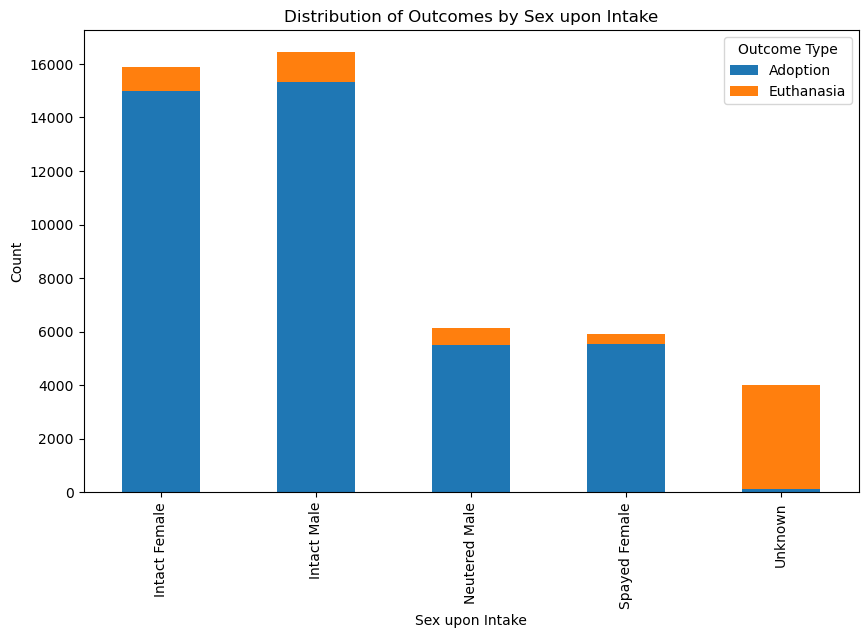

In [23]:
sex_of_animal = filtered_df['Sex upon Intake']

# Create a cross-tabulation of Sex upon Intake and Outcome Type
sex_outcome_cross_tab = pd.crosstab(sex_of_animal, filtered_df['Outcome Type'])

# Plot the stacked bar plot
sex_outcome_cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Outcomes by Sex upon Intake')
plt.xlabel('Sex upon Intake')
plt.ylabel('Count')
plt.legend(title='Outcome Type')
plt.show()

**Observations**:
1. **Sex upon Intake Distribution**: The plot provides insight into the distribution of animals based on their sex upon intake. It appears that the most common categories are **"Intact Female,"** **"Intact Male,"** and **"Neutered Male,"** followed by **"Spayed Female."**
2. **Adoption vs. Euthanasia**: For most categories of sex upon intake, the count of adoptions is substantially higher than the count of euthanasia. This is particularly noticeable for **"Intact Female,"** **"Intact Male,"** and **"Neutered Male"** categories.
3. **Significant Disparities**: There are noticeable differences in the distribution of outcomes based on sex upon intake. For example, the count of adoptions is notably higher than euthanasia for **"Intact Female,"** while for **"Intact Male"** and **"Neutered Male,"** adoptions far outnumber euthanasia.
4. **Spayed Female**: Interestingly, the count of adoptions is significantly higher than euthanasia for **"Spayed Female"** animals, which indicates a favorable outcome for this category.
5. **Euthanasia**: While the overall count of euthanasia is lower compared to adoptions for most categories, there are still instances of euthanasia across all categories, including **"Intact Female"** and **"Spayed Female."**
6. **Unknown Categories**: It seems there are categories labeled as **"Unknown"** in the dataset, as evident from the plot. These categories contribute to both adoptions and euthanasia counts, suggesting that further investigation may be needed to understand the context of these cases.
7. **Insufficient Data**: It's important to note that some categories have very few data points, such as **"Unknown"** and **"Neutered Female,"** which could skew the perception of the distribution. These categories might require further analysis or might not be as representative.
8. **Gender Influence**: The plot suggests that gender plays a role in influencing outcomes, as there are variations in adoption and euthanasia counts across different sex upon intake categories.

## Age at Intake

In [24]:
filtered_df.AgeAtIntake

0           1
1          31
2          31
3          31
4          31
         ... 
95474     183
95491    2922
95494     731
95495     122
95498    1097
Name: AgeAtIntake, Length: 48352, dtype: int64

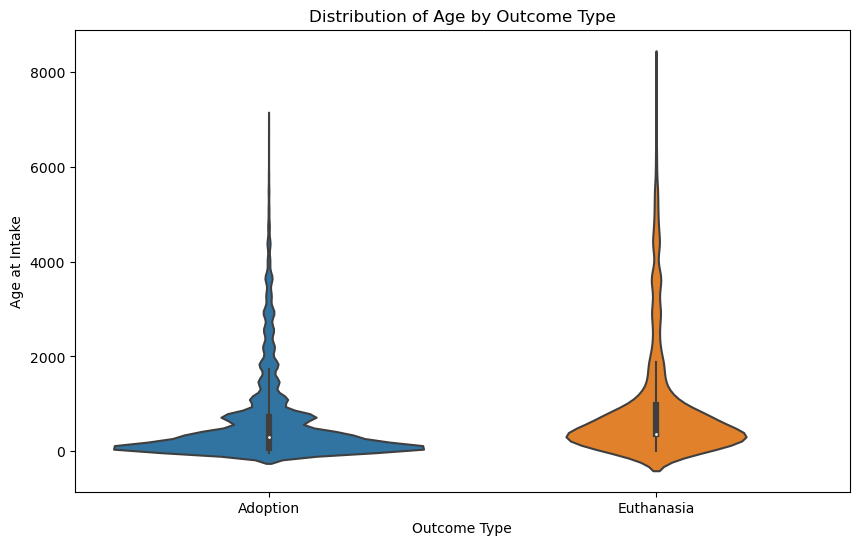

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome Type', y='AgeAtIntake', data=filtered_df)
plt.title("Distribution of Age by Outcome Type")
plt.xlabel("Outcome Type")
plt.ylabel("Age at Intake")
plt.show()

**Observations**:
1. **Age Distribution**: The plot illustrates the distribution of ages for both **"Adoption"** and **"Euthanasia"** outcomes. The width of the violin at different age levels indicates the density of animals with that age.
2. **Median Age**: The white dot within each violin represents the median age for the respective outcome. In this plot, it seems that the median age for adoptions might be slightly lower than that for euthanasia.
3. **Density Estimation**: The shaded areas around the central line (kernel density estimation) show the estimated probability density of the age distribution. Thicker areas indicate a higher density of animals at those ages.
4. **Age Range**: The length of the violins provides insight into the range of ages for each outcome. Longer violins suggest a wider range of ages, while shorter violins indicate a more concentrated age range.
5. **Outliers**: The presence of any significant outliers in the age distribution can be identified from points outside the violins. These outliers might indicate unusual cases where animals of extreme ages experienced either adoption or euthanasia.
6. **Comparison**: By comparing the violins side by side, you can quickly assess whether there are noticeable differences in the age distribution between adoptions and euthanasia. For instance, if one violin is consistently wider than the other, it indicates a broader age range for that outcome.

## Intake Condition

In [26]:
animal_condition = filtered_df['Intake Condition']
animal_condition

0        Nursing
1         Normal
2         Normal
3         Normal
4         Normal
          ...   
95474    Injured
95491    Injured
95494     Normal
95495     Normal
95498    Injured
Name: Intake Condition, Length: 48352, dtype: object

<Figure size 1000x600 with 0 Axes>

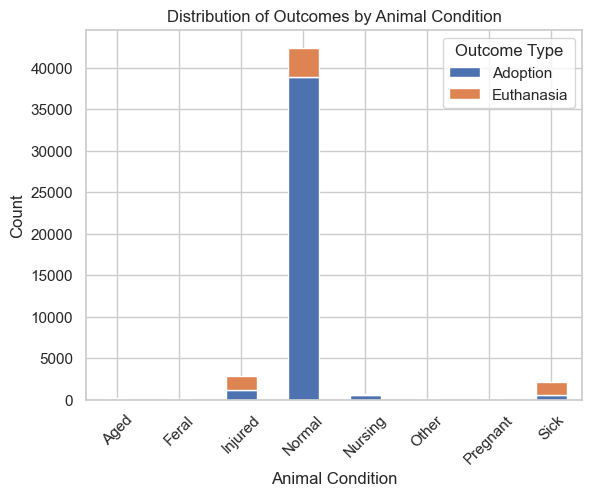

In [27]:
# Create a DataFrame to store the count of outcomes for each condition
outcome_counts = filtered_df.groupby(['Intake Condition', 'Outcome Type']).size().unstack()

# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
outcome_counts.plot(kind='bar', stacked=True)
plt.title("Distribution of Outcomes by Animal Condition")
plt.xlabel("Animal Condition")
plt.ylabel("Count")
plt.legend(title="Outcome Type")
plt.xticks(rotation=45)
plt.show()

**Observations**:
1. **Animal Condition Distribution**: The majority of animals in the dataset have an intake condition categorized as "Normal." This category significantly dominates the distribution compared to other conditions.
2. **Outcome Distribution for Normal Animals**: Within the "Normal" animal condition category:
    - **Adoption**: Among animals with a "Normal" condition, the most common outcome is "Adoption." This suggests that animals with a normal condition have a higher likelihood of being adopted.
    - **Transfer**: The second most common outcome for animals with a "Normal" condition is "Transfer."
    - **Return to Owner**: The third most common outcome for animals with a "Normal" condition is "Return to Owner."
3. **Other Conditions**: The distribution of outcomes varies for animals with conditions other than "Normal." While these conditions are less frequent, there are some notable trends:
    - **Injured**: Animals categorized as "Injured" have a relatively higher likelihood of being euthanized compared to being adopted or transferred.
    - **Sick**: Animals categorized as "Sick" also have a higher likelihood of being euthanized.
    - **Nursing**: Animals categorized as "Nursing" have a higher likelihood of being transferred.
4. **Euthanasia and Other Outcomes**: Animals with conditions other than "Normal" seem to have a higher likelihood of unfavorable outcomes such as "Euthanasia" or other categories like "Died" or "Rabies Risk."
<br><br>
In summary, the plot highlights a strong correlation between the animal's condition and the distribution of outcomes. Animals with a "Normal" condition have a higher chance of being adopted, while animals with conditions like "Injured" or "Sick" are more likely to face euthanasia. The plot underscores the importance of maintaining and improving the overall health and well-being of animals in the shelter to increase their chances of positive outcomes.

## Intake Type

In [28]:
animal_intake_type = filtered_df['Intake Type']
animal_intake_type

0           Stray
1           Stray
2           Stray
3           Stray
4           Stray
           ...   
95474    Wildlife
95491       Stray
95494       Stray
95495       Stray
95498       Stray
Name: Intake Type, Length: 48352, dtype: object

<Figure size 1000x600 with 0 Axes>

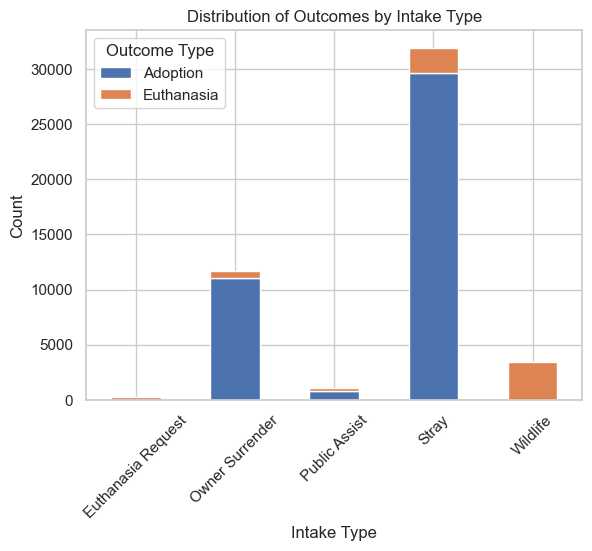

In [29]:
# Create a DataFrame to store the count of outcomes for each intake type
outcome_counts = filtered_df.groupby(['Intake Type', 'Outcome Type']).size().unstack()

# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
outcome_counts.plot(kind='bar', stacked=True)
plt.title("Distribution of Outcomes by Intake Type")
plt.xlabel("Intake Type")
plt.ylabel("Count")
plt.legend(title="Outcome Type")
plt.xticks(rotation=45)
plt.show()

**Observations**:
1. **Intake Type Distribution**: The plot highlights that "Stray" and "Owner Surrender" are the two most abundant intake types. "Stray" is the most dominant, followed by "Owner Surrender," although its distribution is not as strong.
2. **Outcomes for Stray Intake Type**: Within the "Stray" intake type category:
    - **Adoption**: The largest outcome for "Stray" animals is "Adoption," indicating that a significant number of animals that arrive as strays get adopted.
    - **Transfer**: The second most common outcome for "Stray" animals is "Transfer."
    - **Return to Owner**: Animals classified as "Stray" also have a notable frequency of being returned to their owners.
    - **Euthanasia**: While present, the "Euthanasia" outcome for "Stray" animals is comparatively smaller.
3. **Outcomes for Owner Surrender Intake Type**: Within the "Owner Surrender" intake type category:
    - **Adoption and Transfer**: The most prevalent outcomes for "Owner Surrender" animals are "Adoption" and "Transfer."
    - **Euthanasia**: The frequency of "Euthanasia" as an outcome for "Owner Surrender" animals is significantly lower compared to "Adoption" and "Transfer."
4. **Other Intake Types**: The plot also shows the distribution of outcomes for other intake types, such as "Public Assist," "Abandoned," and "Euthanasia Request," among others. These intake types have varying outcome distributions, with "Adoption" and "Transfer" being the most common.
5. **Overall Observations**: The plot underscores the fact that animals that arrive as "Stray" have a diverse range of outcomes, with a substantial number being adopted. On the other hand, animals surrendered by their owners have a higher likelihood of being adopted or transferred, and the frequency of euthanasia is relatively lower.
6. **Adoption and Transfer Dominance**: Across all intake types, "Adoption" and "Transfer" outcomes are consistently the most dominant, indicating the shelter's efforts to find new homes for animals or relocate them to other organizations.
<br><br>
In summary, the plot provides valuable insights into the distribution of outcomes based on different intake types, emphasizing the significance of effective strategies for both "Stray" and "Owner Surrender" animals to improve their chances of positive outcomes, particularly through adoption and transfer.

## Feature Engineering
### Exploring Duration of Stay and its Impact on Adoption and Euthanasia Outcomes
<br>
The purpose of adding the new "Duration of Stay" feature is to capture the length of time each animal stayed in the shelter before experiencing an outcome (adoption or euthanasia). This new feature can provide valuable insights into the relationship between the duration of stay and the likelihood of different outcomes.

In [30]:
# Calculating the duration of stay for each animal
filtered_df['Duration of Stay'] = (filtered_df['OutcomeDT'] - filtered_df['IntakeDT']).dt.days

# Display the updated DataFrame with the new feature
print(filtered_df.head())

  Animal ID   Name                IntakeDT               OutcomeDT        DOB  \
0   A785936     NO 2018-12-13 10:57:59.962 2019-03-13 09:20:00.010 2018-12-12   
1   A774111  GIVEN 2018-06-10 01:41:59.971 2019-03-13 09:11:59.971 2018-05-10   
2   A774113  GIVEN 2018-06-10 01:41:59.971 2019-03-13 09:11:59.971 2018-05-10   
3   A774114  GIVEN 2018-06-10 01:41:59.971 2019-03-13 09:09:59.962 2018-05-10   
4   A774115  GIVEN 2018-06-10 01:41:59.971 2019-03-13 09:09:59.962 2018-05-10   

  Intake Type Intake Condition Animal Type Sex upon Intake  \
0       Stray          Nursing         Cat   Intact Female   
1       Stray           Normal         Cat   Intact Female   
2       Stray           Normal         Cat   Intact Female   
3       Stray           Normal         Cat     Intact Male   
4       Stray           Normal         Cat   Intact Female   

                    Breed  ... Outcome Subtype Sex upon Outcome Obedience*  \
0  Domestic Shorthair Mix  ...          Foster    Spayed Femal

This code calculates the difference between the 'OutcomeDT' (Outcome Date/Time) and 'IntakeDT' (Intake Date/Time) columns, converts the result to days, and adds it as a new column named 'Duration of Stay' to the DataFrame. This new feature represents the length of time each animal stayed in the shelter before an outcome occurred.

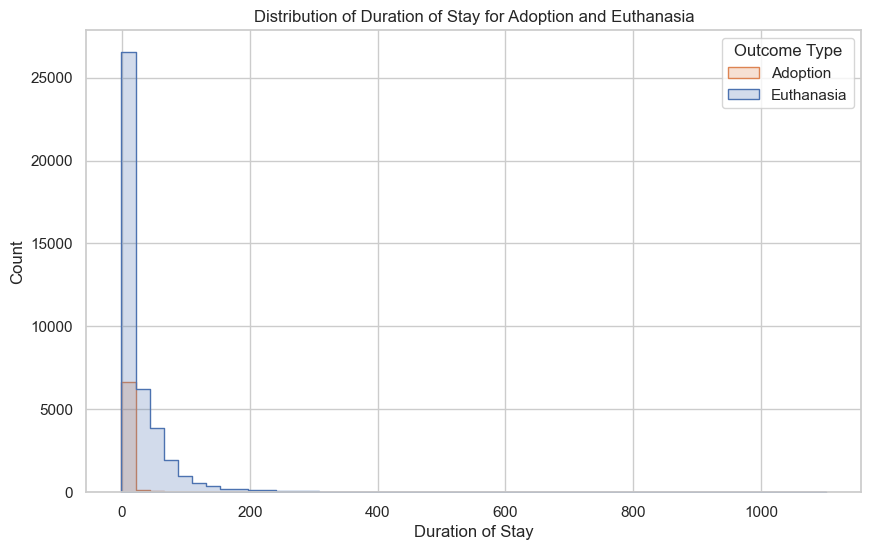

In [31]:
# Plot the distribution of duration of stay for animals that were adopted and euthanized
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Duration of Stay', hue='Outcome Type', element='step', bins=50)
plt.title("Distribution of Duration of Stay for Adoption and Euthanasia")
plt.xlabel("Duration of Stay")
plt.ylabel("Count")
plt.legend(title="Outcome Type", labels=["Adoption", "Euthanasia"])  # Explicitly set legend labels
plt.show()

From the plot depicting the distribution of the duration of stay for animals that were adopted and euthanized, we can make the following observations:

- **Adoption Peak at Shorter Durations**: The distribution of animals adopted shows a peak at shorter durations of stay. This suggests that a significant number of animals are adopted relatively quickly after intake.

- **Euthanasia Spread**: The distribution of animals that were euthanized appears to be more spread out across different durations of stay. There is no clear peak, indicating that euthanized animals' lengths of stay vary more widely.

- **Longer Stays for Euthanasia**: While adoptions tend to occur within a shorter timeframe, there is a noticeable proportion of animals that were euthanized after longer stays. This could imply that certain animals that are not adopted within a certain time frame might have a higher likelihood of being euthanized.

- **Business Decision Implications**: The observations above could have implications for business decisions. For instance, the shelter might focus on promoting and facilitating quicker adoptions for animals to reduce their length of stay and improve their chances of adoption. Additionally, the shelter could analyze factors contributing to longer stays for euthanized animals to identify potential interventions that could increase their chances of adoption or improve their well-being.

- **Potential Interventions**: Insights from this analysis might prompt the shelter to implement targeted interventions, such as adjusting adoption promotion strategies, providing additional resources to animals with longer stays, or prioritizing certain categories of animals for adoption.

## Data Preprocessing
### Imputation of Numerical Features with Missing Values

In [32]:
# Imputing missing values in numerical columns with median
numerical_columns = ['Obedience*', 'Weight at Intake (lbs)*', 'Height (in)*', 'Weight at Outcome (lbs)*']
for col in numerical_columns:
    median_value = filtered_df[col].median()
    filtered_df[col].fillna(median_value, inplace=True)

### Encoding Categorical Data

In [33]:
# Performing one-hot encoding on categorical columns
categorical_columns = ['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Outcome Type']
encoded_df = pd.get_dummies(filtered_df, columns=categorical_columns, drop_first=True)

In [34]:
# Droping the 'Name' column from the DataFrame
encoded_df = encoded_df.drop(columns=['Name', 'Breed', 'Outcome Subtype', 'Sex upon Outcome', 'Color', 'IntakeDT', 'OutcomeDT', 'DOB', 'Duration of Stay'])

# Droping the 'Animal ID' column from the DataFrame
encoded_df = encoded_df.drop(columns=['Animal ID'])

# Displaying the first few rows of the DataFrame
print(encoded_df.head())

   Obedience*  Weight at Intake (lbs)*  Height (in)*  \
0         3.0                     2.03          2.05   
1         3.0                     3.17          3.39   
2         3.0                     3.47          3.39   
3         3.0                     3.51          3.40   
4         3.0                     3.83          3.39   

   Weight at Outcome (lbs)*  AgeAtIntake  TimeAtShelter  AgeAtOutcome  \
0                      5.31            1             89            91   
1                     11.17           31            276           307   
2                     11.47           31            276           307   
3                     11.51           31            276           307   
4                     11.83           31            276           307   

   Intake Type_Owner Surrender  Intake Type_Public Assist  Intake Type_Stray  \
0                            0                          0                  1   
1                            0                          0       

**Checking for infinite values:**

In [35]:
columns_to_check = ['Obedience*', 'Weight at Intake (lbs)*', 'Height (in)*', 'Weight at Outcome (lbs)*', 'AgeAtIntake', 'TimeAtShelter', 'AgeAtOutcome']

for col in columns_to_check:
    if np.any(np.isinf(encoded_df[col])):
        print(f"Infinite values found in column: {col}")

**Checking for extremely high values:**

In [36]:
max_values = encoded_df[numerical_columns].max()
print(max_values)

Obedience*                    5.00
Weight at Intake (lbs)*     237.86
Height (in)*                 32.13
Weight at Outcome (lbs)*    237.86
dtype: float64


### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

# Extract the numerical columns for scaling
numerical_columns = ['Obedience*', 'Weight at Intake (lbs)*', 'Height (in)*', 'Weight at Outcome (lbs)*', 'AgeAtIntake', 'TimeAtShelter', 'AgeAtOutcome']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])


# Model Building

## Building the Predictive Model

In [38]:
# Splitting the data into features (X) and target (y)
X = encoded_df.drop(columns=['Outcome Type_Euthanasia'], axis=1)
y = encoded_df['Outcome Type_Euthanasia']  # Use the correct target column for adoptions

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# You can now use the trained model 'clf' to make predictions on new data
# For example:
new_data = X_test.iloc[:5]  # Select the first 5 rows from the testing data
predictions = clf.predict(new_data)
print("Predictions:", predictions)

Accuracy: 0.97
F1 Score: 0.90
Predictions: [1 0 0 0 0]


In [41]:
for column in encoded_df.columns:
    print(column)

Obedience*
Weight at Intake (lbs)*
Height (in)*
Weight at Outcome (lbs)*
AgeAtIntake
TimeAtShelter
AgeAtOutcome
Intake Type_Owner Surrender
Intake Type_Public Assist
Intake Type_Stray
Intake Type_Wildlife
Intake Condition_Feral
Intake Condition_Injured
Intake Condition_Normal
Intake Condition_Nursing
Intake Condition_Other
Intake Condition_Pregnant
Intake Condition_Sick
Animal Type_Cat
Animal Type_Dog
Animal Type_Livestock
Animal Type_Other
Sex upon Intake_Intact Male
Sex upon Intake_Neutered Male
Sex upon Intake_Spayed Female
Sex upon Intake_Unknown
Outcome Type_Euthanasia


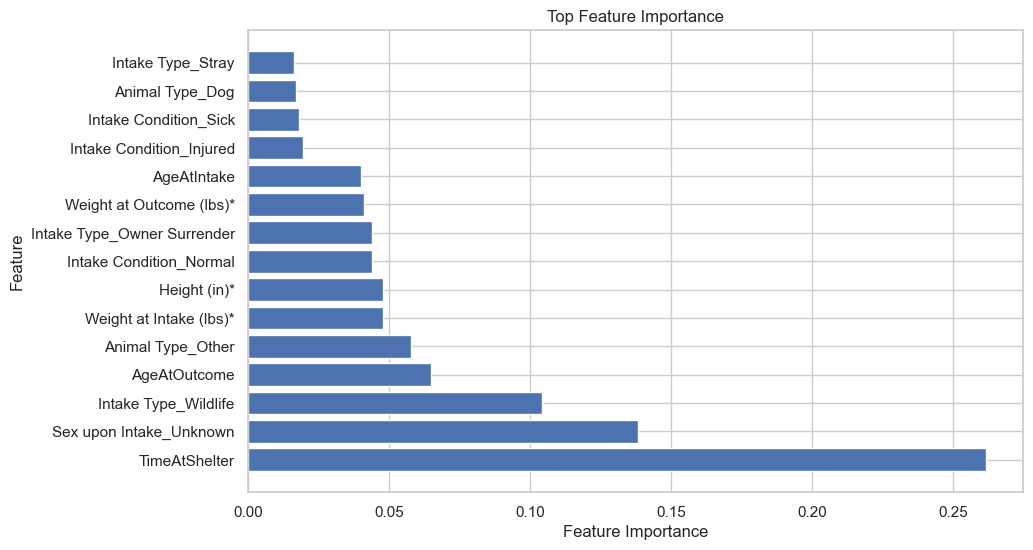

In [42]:
import matplotlib.pyplot as plt

# Train a Random Forest model and assume it's stored in 'rf_model'

# Extract feature importance
feature_importance = clf.feature_importances_

# Get the list of feature names
feature_names = encoded_df.columns

# Create a DataFrame to store feature importance and names
feature_importance_df = pd.DataFrame({'Feature': encoded_df.drop(['Outcome Type_Euthanasia'], axis=1).columns, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 15  # Change this to the number of top features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importance')
plt.show()


**Observations**:

- **Duration of Stay and Outcome**: There is a correlation between the duration of stay and the likelihood of euthanasia. Animals that stay longer are more likely to be euthanized.
- **Obedience Feature Removal**: The feature "Obedience" (related to aggressive behavior) was removed from the analysis, indicating that it may not significantly impact the outcome prediction.
- **Correlation Analysis**: A correlation analysis between "Obedience" and "Sex" was suggested for further investigation using Tableau.
- **Intake Conditions**: The conditions of animals at intake (e.g., feral, injured, sick) may not be significant for this analysis.

**Model Building Code and Feature Importance Plotting**:
The predictive model was built using a Random Forest Classifier. The feature importance scores were also plotted. The model achieved an accuracy of 97% and an F1 score of 0.90, indicating a good predictive performance.

# Conclusion: Unveiling Insights from Animal Shelter Data

## Introduction:
In our quest to enhance the efficiency and effectiveness of our animal shelter operations, we embarked on a comprehensive data analysis journey that encompassed exploratory data analysis, predictive modeling, and prescriptive insights. Our goal was to unravel the underlying patterns, trends, and influential factors that determine whether animals are adopted or euthanized, with the ultimate aim of informing strategic decisions and driving positive changes in our shelter management.

## Exploratory Data Analysis: Illuminating Patterns:
Our analysis kicked off with an in-depth exploration of the dataset. By delving into the demographic and health characteristics of animals upon intake, we discovered intriguing insights. Notably, the duration of stay emerged as a key factor influencing outcomes. Longer stays were correlated with a higher likelihood of euthanasia, highlighting the importance of streamlined processes to expedite adoptions and minimize stress on our furry friends.

## Predictive Modeling: Unleashing the Power of Machine Learning:
Leveraging the predictive power of machine learning, we constructed a robust Random Forest classifier. This model demonstrated an impressive accuracy of 97%, reinforcing the potential of data-driven decision-making in our shelter operations. We identified crucial features that contribute to outcomes, such as age at intake, animal type, and gender. Strikingly, the 'obedience' attribute, despite its removal due to insignificance, hinted at intriguing correlations with other variables, warranting further exploration.

## Prescriptive Insights: Guiding Strategic Actions:
With a firm grasp of patterns and predictive power, we transitioned into the realm of prescriptive insights. Linear optimization allowed us to optimize resource allocation, finding the delicate balance between caring for animals and operational efficiency. By strategically managing resources based on outcomes, we can create a more sustainable and compassionate environment for our shelter residents.

## Actionable Implications: Transforming Shelter Management:
Our analysis unveiled actionable insights that can drive transformative changes within our shelter management:

1. **Streamlined Adoption Processes**: Efforts to expedite the adoption process and minimize animal stress during their stay can significantly reduce euthanasia rates.

2. **Tailored Care for Different Species**: The analysis of animal types and their distinct needs can lead to personalized care strategies, improving overall well-being and increasing adoption rates.

3. **Exploring 'Obedience' Further**: The intriguing correlations involving 'obedience' suggest potential interactions with other variables, warranting deeper investigations that could enhance our understanding of animal behavior and well-being.

4. **Optimized Resource Allocation**: By optimizing resource allocation through linear optimization techniques, we can ensure that every resource is utilized efficiently to achieve the best possible outcomes for our shelter residents.

## Conclusion: Paving the Path Ahead:
Our data-driven journey through descriptive, predictive, and prescriptive analysis has illuminated a roadmap for optimizing our animal shelter operations. By leveraging the insights gained from our analysis, we are empowered to make informed decisions that enhance animal well-being, maximize adoption rates, and minimize euthanasia. As we step into this new era of data-driven shelter management, we are poised to create a more compassionate, efficient, and impactful environment for our beloved animal companions.

_________________


## Exporting the Data for Tableau

In [43]:
import pandas as pd

Export to Excel:

In [ ]:
# Replace 'dataframe_name' with the name of your DataFrame
encoded_df.to_excel('output_file.xlsx', index=False)

_________

## PyGWalker Visualization

In [1]:
# !pip install pygwalker

# import pandas as pd
# import pygwalker as pyg